In [50]:
#pandas stands for python data analysis library
import pandas as pd
#data cleaning and manipulation
#provides large set of numeric data types to construct arrays
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#package have functions to change raw feature vectors into representation
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report,precision_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
#set data visualization style
sns.set(style="whitegrid",color_codes=True,font_scale=1.3)
#plots displayed inline
%matplotlib inline

In [4]:
df=pd.read_csv("/Users/Lenovo/input/data.csv", index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [4]:
df = df.drop('Unnamed: 32', axis=1)

In [7]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Number of Benign cells:  357
Number of Malignant cells:  212

% of Benign cells  62.742 %
% of Malignant cells  37.258 %


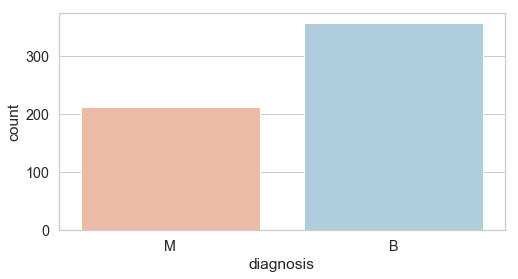

In [8]:
#Unnamed: 32 is full of missing values
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'],palette='RdBu')
#count malignant and benign
benign, malignant =df['diagnosis'].value_counts()
print('Number of Benign cells: ',benign)
print('Number of Malignant cells: ',malignant)
print('')
print('% of Benign cells ',round(benign/len(df)*100,3),'%')
print('% of Malignant cells ',round(malignant/len(df)*100,3),'%')


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


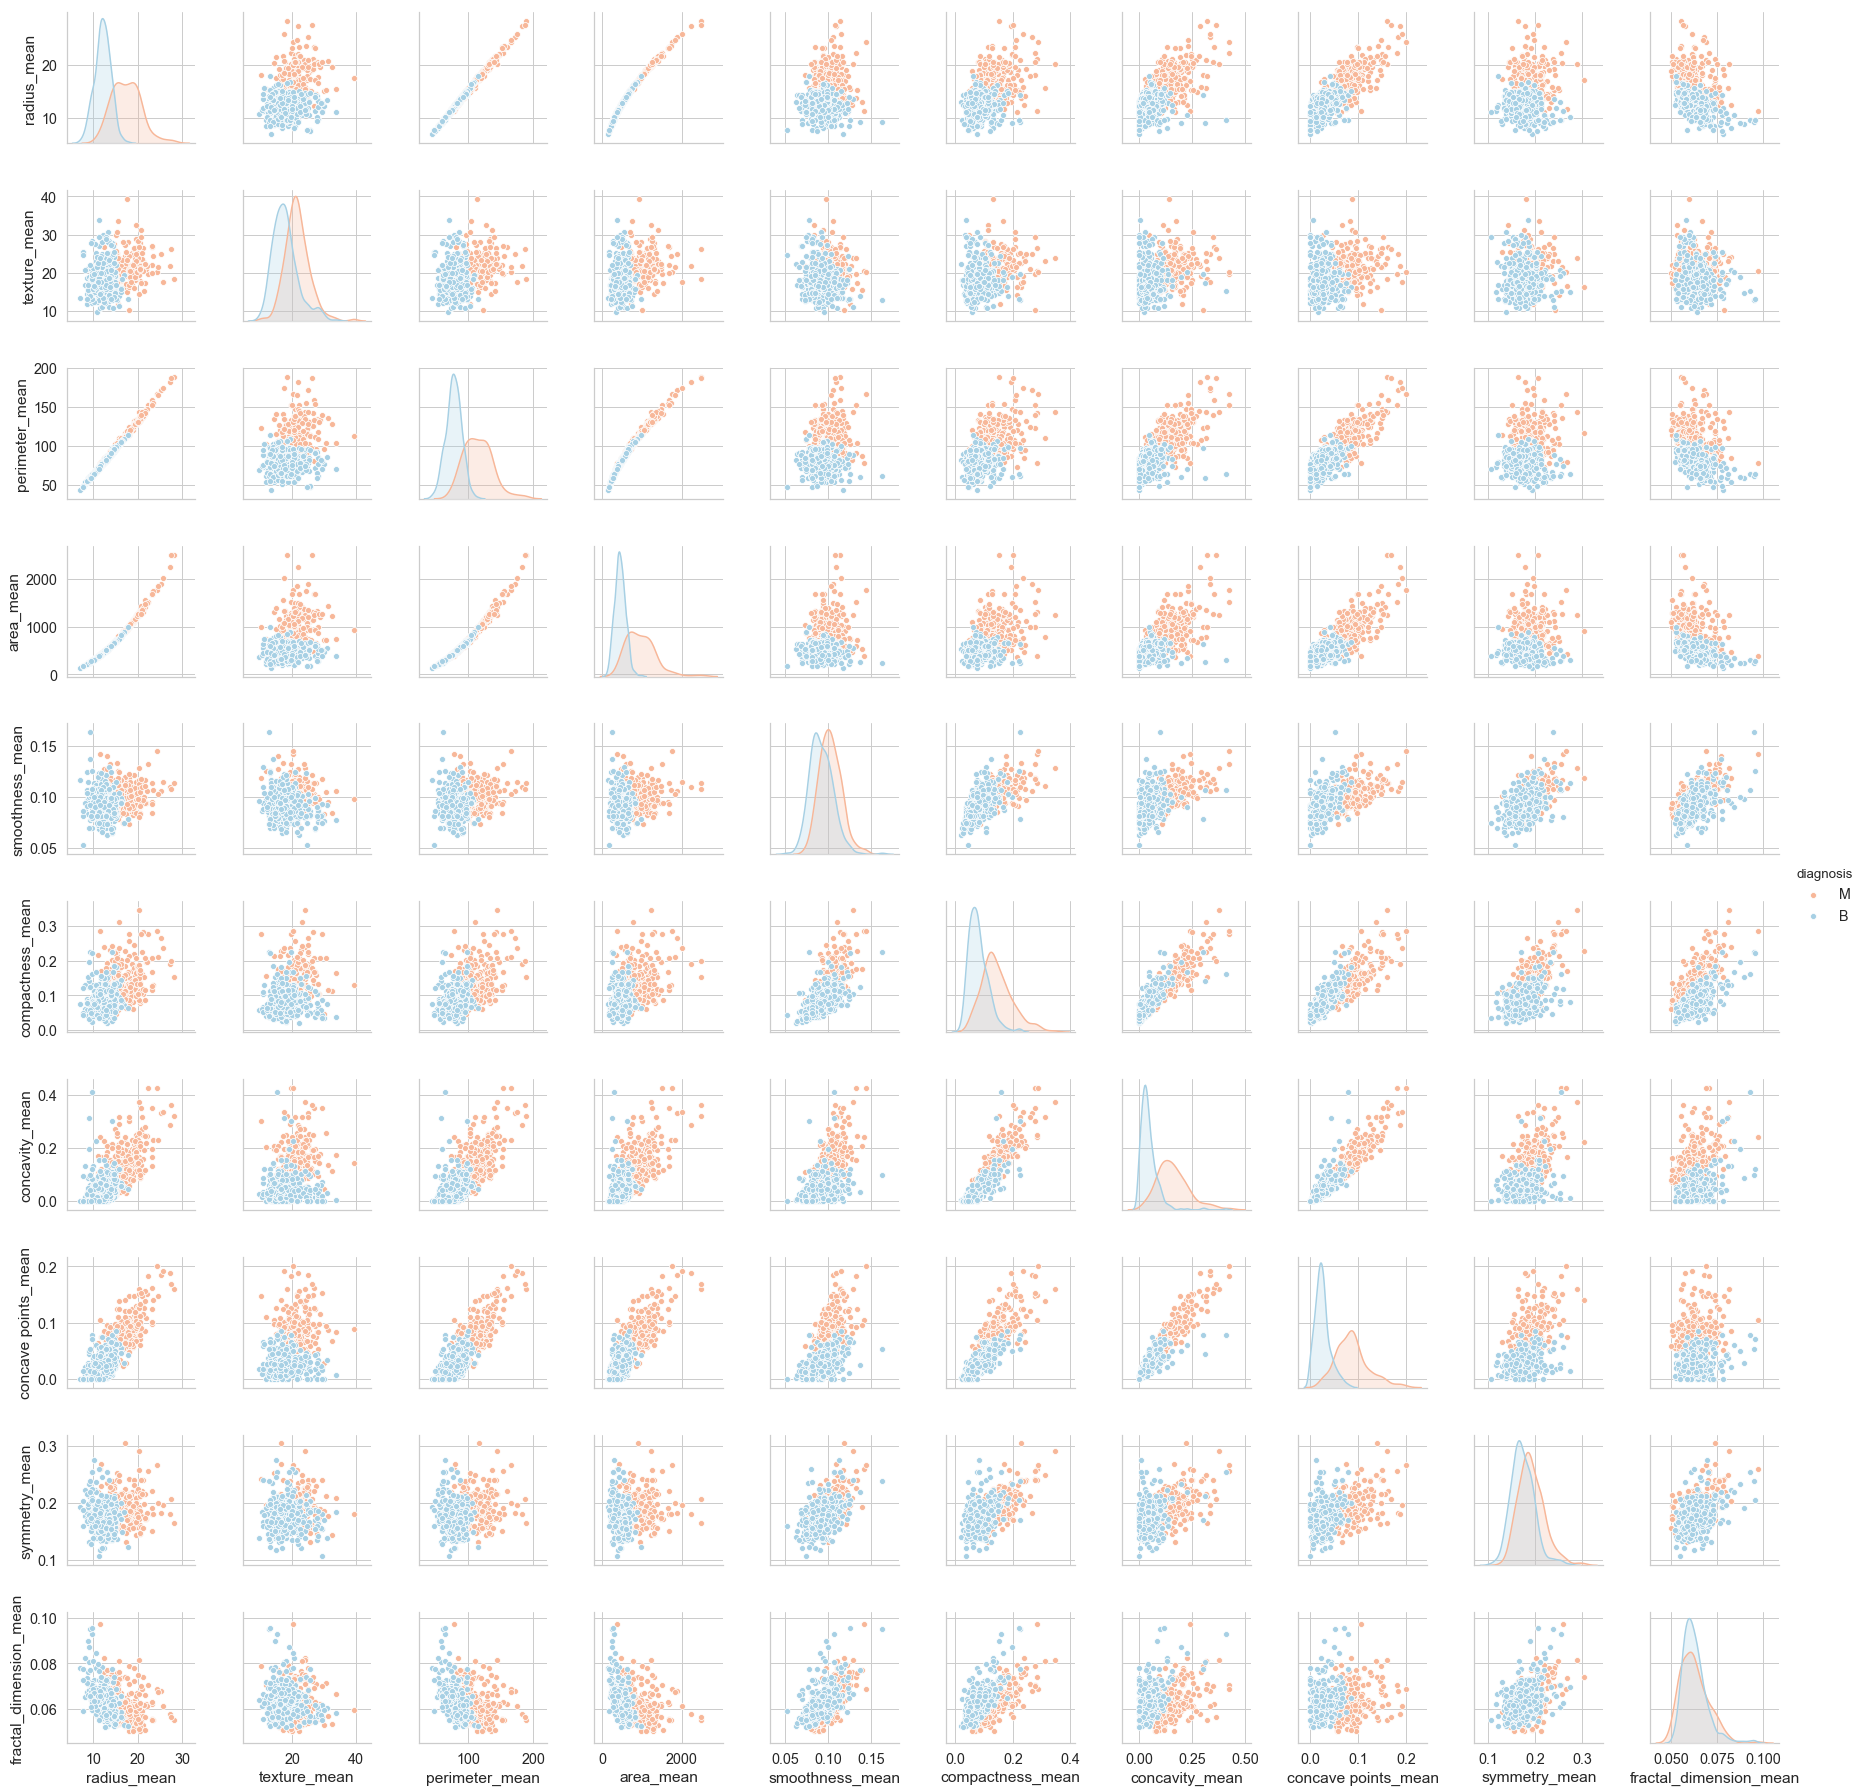

In [9]:
cols =['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']
sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')

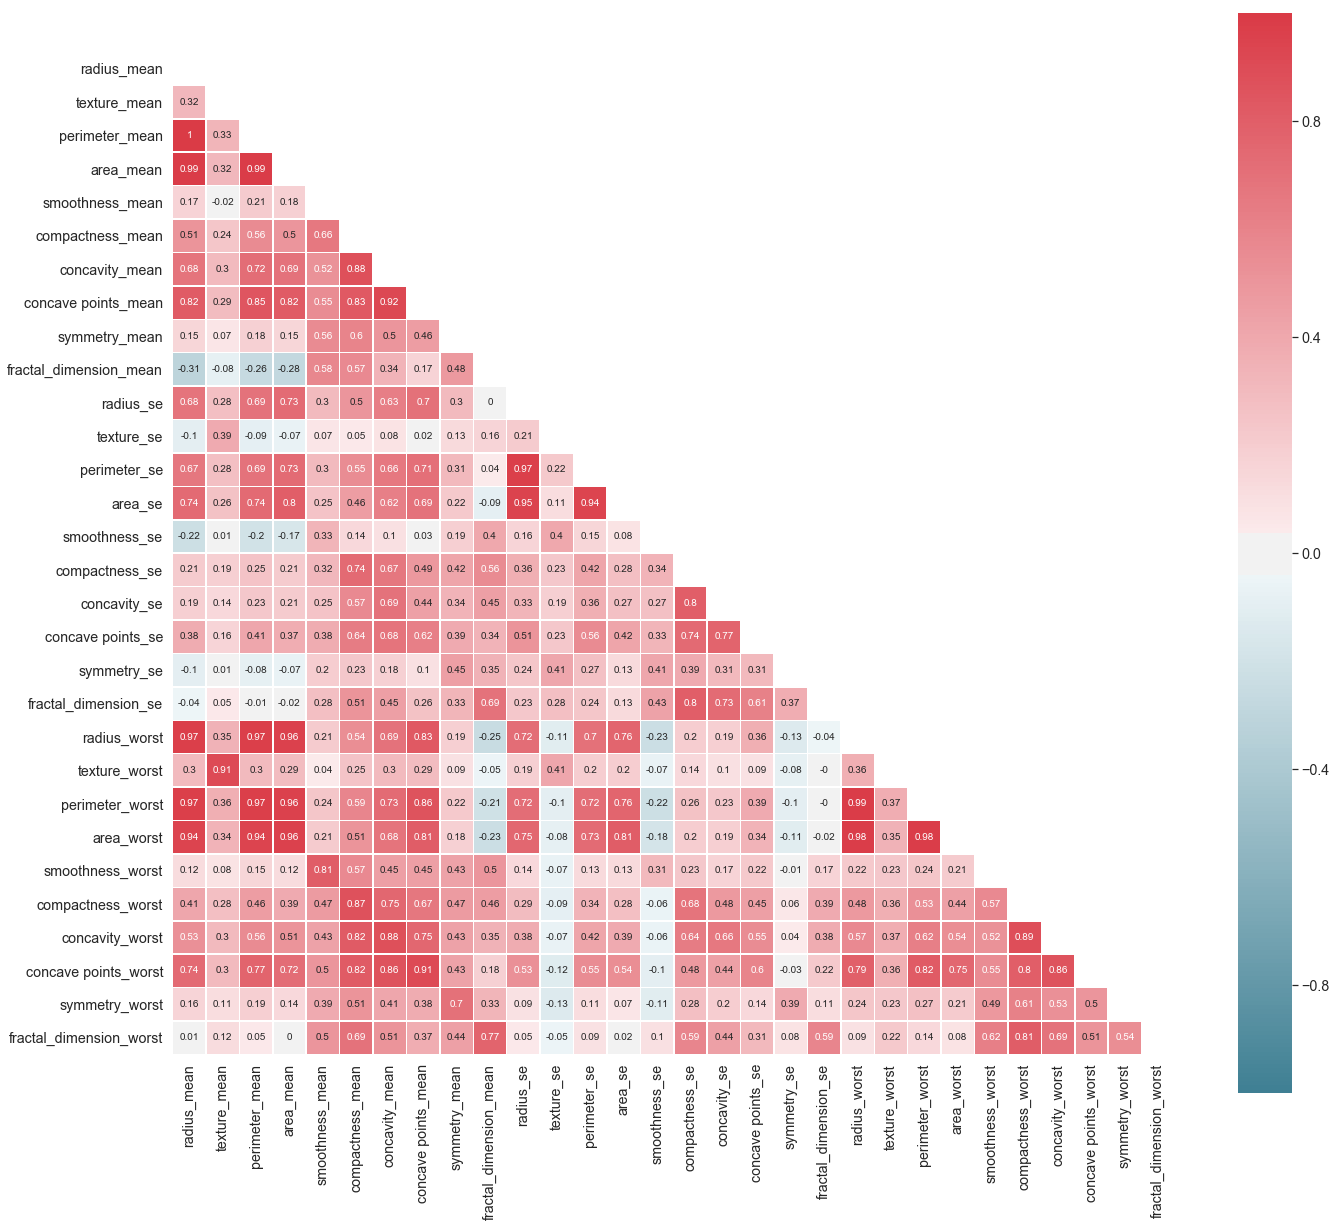

In [10]:
#perfectly linear patterns between the radius, perimeter and area attributes are hinting at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness
#Correlation Coefficient is a statistical measure that reflects the correlation between two stocks/financial instruments
#visualizing correlation matrix
corr= df.corr().round(2)
#numpy=np 
#Return array of given shape and type as given array, with zeros
mask=np.zeros_like(corr, dtype=np.bool)
#Extract upper triangle from numpy matrix
mask[np.triu_indices_from(mask)]=True
#set figure size
f,ax =plt.subplots(figsize=(20,20))
#custom colormap
cmap = sns.diverging_palette(220 ,10, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=True)
plt.tight_layout()

In [11]:
#radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell).
#Pick one of them for furthur analysis.
# "worst" columns are essentially just a subset of the "mean" columns  discard the "worst" columns from our analysis and only focus on the "mean" columns
#a cell as roughly taking a form of a circle,  formula for its perimeter and area are then  2πr  and  πr2
#drop all unnecessary columns.
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

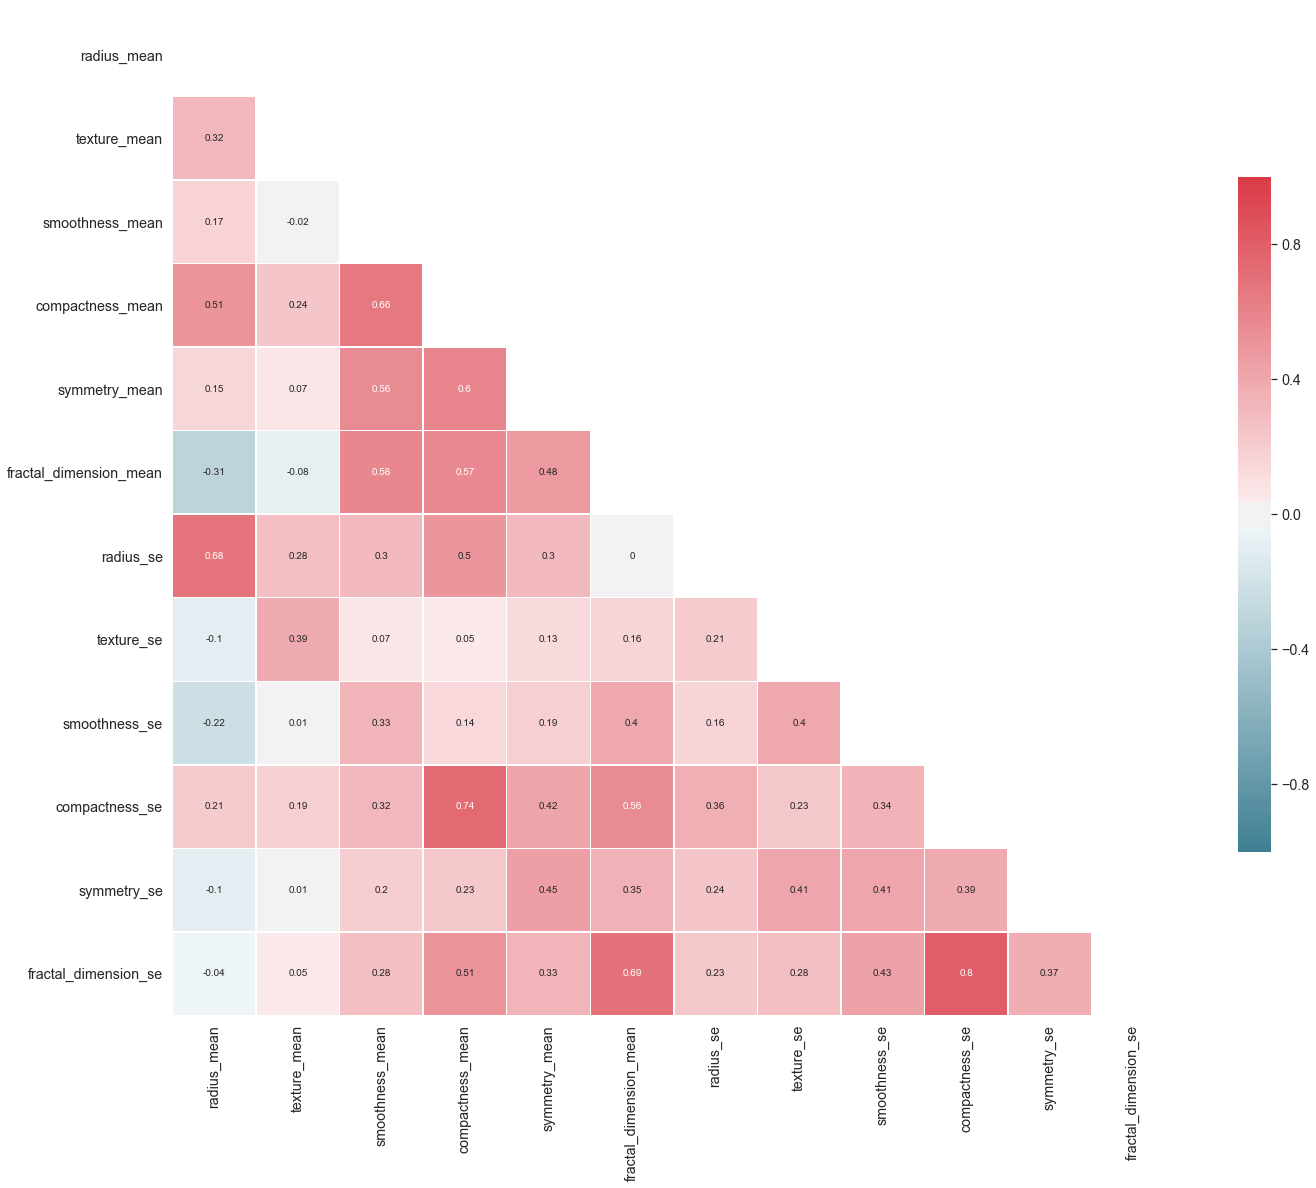

In [12]:
#trimmed correlation matrix:
corr= df.corr().round(2)
#numpy=np 
#Return array of given shape and type as given array, with zeros
mask=np.zeros_like(corr, dtype=np.bool)
#Extract upper triangle from numpy matrix
mask[np.triu_indices_from(mask)]=True
#set figure size
f,ax =plt.subplots(figsize=(20,20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

In [13]:
# to avoid overfitting we will split  our dataset into two parts; one as a training set for the model, and the other as a test set to validate the predictions that the model will make.
#overfitting is when model works good for training set but fails to predict in new examples
X =df
y= df['diagnosis']
# random_state is the seed used by the random number generator
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)


In [14]:
cols=df.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



In [15]:
#statsmodels.formula.api as smf
#generalized Linear Model (GLM)
model =smf.glm(formula=formula ,data=X_train,family=sm.families.Binomial())
logistic_fit = model.fit()
print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      385
Model Family:                              Binomial   Df Model:                           12
Link Function:                                logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -55.340
Date:                              Sun, 07 Oct 2018   Deviance:                       110.68
Time:                                      03:32:44   Pearson chi2:                     125.
No. Iterations:                                   9   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

In [16]:
predictions = logistic_fit.predict(X_test)
predictions[1:11]

id
848406      0.324251
907915      0.996906
911201      0.964710
84799002    0.000544
8911164     0.838719
9113156     0.609435
863031      0.967341
8711216     0.053005
865137      0.999907
846226      0.000049
dtype: float64

In [17]:
predictions_nominal =["M" if x< 0.5 else "B" for x in predictions]
predictions_nominal[1:11]
#probabilities closer to 0 have been labeled as "M", while the ones closer to 1 have been labeled as "B". 

['M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M']

In [18]:
# evaluate the accuracy of our predictions by confusion matrix
print(classification_report(y_test,predictions_nominal,digits=3))
cfm=confusion_matrix(y_test,predictions_nominal)
true_positive =cfm[1][1]
false_positive =cfm[0][1]
false_negative =cfm[1][0]
true_negative =cfm[0][0]
print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct predictions accuracy', round((true_negative+true_positive)/len(predictions_nominal)*100,1),'%')

              precision    recall  f1-score   support

           B      0.982     0.965     0.974       115
           M      0.931     0.964     0.947        56

   micro avg      0.965     0.965     0.965       171
   macro avg      0.957     0.965     0.961       171
weighted avg      0.966     0.965     0.965       171

Confusion Matrix: 
 [[111   4]
 [  2  54]] 

True Negative: 111
False Positive: 4
False Negative: 2
True Positive: 54
Correct predictions accuracy 96.5 %


In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
diag_map = {'M':1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diag_map)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [27]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [25]:
train, test = train_test_split(df, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [28]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [61]:
model=RandomForestClassifier(n_estimators=100)

In [62]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
prediction=model.predict(test_X)

In [64]:
acc=accuracy_score(prediction,test_y)
print("Random forest classifier Accuracy: {0:.2%}".format(acc))

Random forest classifier Accuracy: 94.74%


In [56]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
acc=accuracy_score(prediction,test_y)
print("Support vector machine Accuracy: {0:.2%}".format(acc))

Support vector machine Accuracy: 85.96%


In [65]:
X = df.loc[:,prediction_var]
y = df.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [66]:

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, scoring = 'average_precision', n_jobs=-1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

Dedicion Tree Accuracy: 91.23%
